# Cornershop's Data Science Test

## Dev: Mateus Broilo
mateus.brilo90@gmail.com

* Objectives: Load Datasets and perform 

 # Summary

* Initials
    * Loading Libraries and Packages
    * Configurations
    * Global Variables
* Loading data
    * Prepared Dataset  
* Model
    * Splitting Train/Test data: 80/20
        * Normalization
    * Logistic Regression
    * Support Vector Machine
    * XGBoost: Default
* POC: XGBBoost Default
* Save Model


# Initials
* Loading Libraries and Packages
* Configuration
* Global Variables

## Loading Libraries and Packages 

In [1]:
# general
import warnings
import time
import gc

#data
import pandas as pd
import numpy as np
import datetime

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## model
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb

In [2]:
ls -l ../data/

total 1596
-rw-rw-r-- 1 broilo broilo  514550 mai 20 16:56 20220520_corrected_sheet1.csv
-rw-rw-r-- 1 broilo broilo 1118073 mai 22 22:33 20220522_data_prep.csv


In [3]:
ls -l ../raw_data/

total 1736
-rw-rw-r-- 1 broilo broilo 885777 mai 20 13:57 20220520_rawdata_original.xlsx
-rw-rw-r-- 1 broilo broilo 885777 mai 20 13:57 Missão_Stone_-_Dados_de_trx.xlsx


## Configurations

In [4]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 12, 
    'axes.titlesize': 24, 'xtick.labelsize': 14, 'ytick.labelsize': 12}

sns.set(rc=rc)
sns.set_palette("tab10")
sns.set_style("darkgrid")#sns.set_style("whitegrid")

## Global Variables

In [5]:
PATH_DATA = "../data/"
DATASET_PREP = "20220522_data_prep.csv"
DATASET_VAL = "20220520_rawdata_original.csv"
DATE = time.strftime("%Y%m%d")
SEED = 42 # The answer to the ultimate question of life, the universe and everything is 42.

# Loading Datasets
* Prepared Dataset

## Prepared Dataset

In [27]:
df = pd.read_csv(PATH_DATA + DATASET_PREP, sep=',', index_col=['Cartão', 'Data'])
print(df.shape)
df

(11003, 20)


Valor  pure_time  same_day_count  \
Cartão           Data                                                    
400217******1137 2015-05-06 09:37:46  198.0   9.629444               1   
400217******1353 2015-05-27 23:37:20  172.5  23.622222               8   
                 2015-05-27 23:38:58  172.5  23.649444               8   
                 2015-05-27 23:40:15  172.5  23.670833               8   
                 2015-05-27 23:41:38  172.5  23.693889               8   
...                                     ...        ...             ...   
554932******8129 2015-05-20 22:52:46  112.0  22.879444               5   
                 2015-05-20 23:04:29  134.4  23.074722               5   
554932******8142 2015-05-06 18:15:53  207.0  18.264722               1   
554932******9115 2015-05-28 15:31:22  138.0  15.522778               1   
558285******7261 2015-05-18 21:20:51   69.0  21.347500               1   

                                      same_day_valor_count  rank_same_day  \
Cartão           Data                                                       
400217******1137 2015-05-06 09:37:46                     1            1.0   
400217******1353 2015-05-27 23:37:20                     8            1.0   
                 2015-05-27 23:38:58                     8            2.0   
                 2015-05-27 23:40:15                     8            3.0   
                 2015-05-27 23:41:38                     8            4.0   
...                                                    ...            ...   
554932******8129 2015-05-20 22:52:46                     4            4.0   
                 2015-05-20 23:04:29                     1            5.0   
554932******8142 2015-05-06 18:15:53                     1            1.0   
554932******9115 2015-05-28 15:31:22                     1            1.0   
558285******7261 2015-05-18 21:20:51                     1            1.0   

                                      diff_time  day_name_Friday  \
Cartão           Data                                              
400217******1137 2015-05-06 09:37:46   0.000000                0   
400217******1353 2015-05-27 23:37:20   0.000000                0   
                 2015-05-27 23:38:58   0.027222                0   
                 2015-05-27 23:40:15   0.021389                0   
                 2015-05-27 23:41:38   0.023056                0   
...                                         ...              ...   
554932******8129 2015-05-20 22:52:46   0.022222                0   
                 2015-05-20 23:04:29   0.195278                0   
554932******8142 2015-05-06 18:15:53   0.000000                0   
554932******9115 2015-05-28 15:31:22   0.000000                0   
558285******7261 2015-05-18 21:20:51   0.000000                0   

                                      day_name_Monday  day_name_Saturday  \
Cartão           Data                                                      
400217******1137 2015-05-06 09:37:46                0                  0   
400217******1353 2015-05-27 23:37:20                0                  0   
                 2015-05-27 23:38:58                0                  0   
                 2015-05-27 23:40:15                0                  0   
                 2015-05-27 23:41:38                0                  0   
...                                               ...                ...   
554932******8129 2015-05-20 22:52:46                0                  0   
                 2015-05-20 23:04:29                0                  0   
554932******8142 2015-05-06 18:15:53                0                  0   
554932******9115 2015-05-28 15:31:22                0                  0   
558285******7261 2015-05-18 21:20:51                1                  0   

                                      day_name_Sunday  day_name_Thursday  \
Cartão           Data                                                      
400217******1137 2015-05-06 09:37:46           

In [28]:
df.CBK_Sim.map({0:'Não',1:'Sim'})

Cartão            Data               
400217******1137  2015-05-06 09:37:46    Não
400217******1353  2015-05-27 23:37:20    Sim
                  2015-05-27 23:38:58    Sim
                  2015-05-27 23:40:15    Sim
                  2015-05-27 23:41:38    Sim
                                        ... 
554932******8129  2015-05-20 22:52:46    Não
                  2015-05-20 23:04:29    Não
554932******8142  2015-05-06 18:15:53    Não
554932******9115  2015-05-28 15:31:22    Não
558285******7261  2015-05-18 21:20:51    Não
Name: CBK_Sim, Length: 11003, dtype: object

# Model
* Splitting Train/Test data: 80/20
    * Normalization
* Logistic Regression
* Support Vector Machine
* XGBoost: Default

## Splitting Train/Test data: 80/20

In [29]:
features = [
    'Valor',
    'pure_time',
    'same_day_count',
    'same_day_valor_count',
    'rank_same_day',
    'diff_time',
    'day_name_Friday',
    'day_name_Monday',
    'day_name_Saturday',
    'day_name_Sunday',
    'day_name_Thursday',
    'day_name_Tuesday',
    'day_name_Wednesday',
    'day_of_month_RANGE_1-5',
    'day_of_month_RANGE_11-15',
    'day_of_month_RANGE_16-20',
    'day_of_month_RANGE_21-25',
    'day_of_month_RANGE_6-10',
    'day_of_month_RANGE_>25'
]

features_set1 = features
features_set2 = list(df[features].drop(columns=['same_day_count','same_day_valor_count']))
features_set3 = list(df[features].drop(columns=[
    'day_name_Friday',
    'day_name_Monday',
    'day_name_Saturday',
    'day_name_Sunday',
    'day_name_Thursday',
    'day_name_Tuesday',
    'day_name_Wednesday',
    'day_of_month_RANGE_1-5',
    'day_of_month_RANGE_11-15',
    'day_of_month_RANGE_16-20',
    'day_of_month_RANGE_21-25',
    'day_of_month_RANGE_6-10',
    'day_of_month_RANGE_>25'
]))

label = ['CBK_Sim']

Xs1 = df[features_set1]
Xs2 = df[features_set2]
Xs3 = df[features_set3]
y = df[label]

Xs1_train, Xs1_test, y_train, y_test = train_test_split(Xs1, y, train_size = 0.8, random_state = SEED)
Xs2_train, Xs2_test, y_train, y_test = train_test_split(Xs2, y, train_size = 0.8, random_state = SEED)
Xs3_train, Xs3_test, y_train, y_test = train_test_split(Xs3, y, train_size = 0.8, random_state = SEED)

In [8]:
print("Features Set1:")
print("Train dataset shape: " + f"{Xs1_train.shape}")
print("Test dataset shape: " + f"{Xs1_test.shape}")
print(40*"-")
print(f"Xs1_train + Xs1_test dataset: {Xs1_train.shape[0] + Xs1_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

print("Features Set2:")
print("Train dataset shape: " + f"{Xs2_train.shape}")
print("Test dataset shape: " + f"{Xs2_test.shape}")
print(40*"-")
print(f"Xs2_train + Xs2_test dataset: {Xs2_train.shape[0] + Xs2_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

print("Features Set3:")
print("Train dataset shape: " + f"{Xs3_train.shape}")
print("Test dataset shape: " + f"{Xs3_test.shape}")
print(40*"-")
print(f"Xs3_train + Xs3_test dataset: {Xs3_train.shape[0] + Xs3_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

Features Set1:
Train dataset shape: (8802, 19)
Test dataset shape: (2201, 19)
----------------------------------------
Xs1_train + Xs1_test dataset: 11003
Total dataset: 11003


Features Set2:
Train dataset shape: (8802, 17)
Test dataset shape: (2201, 17)
----------------------------------------
Xs2_train + Xs2_test dataset: 11003
Total dataset: 11003


Features Set3:
Train dataset shape: (8802, 6)
Test dataset shape: (2201, 6)
----------------------------------------
Xs3_train + Xs3_test dataset: 11003
Total dataset: 11003




### Normalization

In [9]:
ss = StandardScaler()

# Set 1
scaler_s1 = ss.fit(Xs1_train)
Xs1norm_train = scaler_s1.transform(Xs1_train)
Xs1norm_test = scaler_s1.transform(Xs1_test)

# Set 2
scaler_s2 = ss.fit(Xs2_train)
Xs2norm_train = scaler_s2.transform(Xs2_train)
Xs2norm_test = scaler_s2.transform(Xs2_test)

# Set 3
scaler_s3 = ss.fit(Xs3_train)
Xs3norm_train = scaler_s3.transform(Xs3_train)
Xs3norm_test = scaler_s3.transform(Xs3_test)

## Logistic Regression

In [10]:
lr = LogisticRegression()

# Set 1
lr.fit(Xs1norm_train, y_train)
y_pred_dLRs1 = lr.predict(Xs1norm_test)
y_pred_dLRs1_scores = lr.predict_proba(Xs1norm_train)
print("Set 1:")
print("Acc: ", accuracy_score(y_test, y_pred_dLRs1))
print("Precision: ", precision_score(y_test, y_pred_dLRs1))
print("Recall: ", recall_score(y_test, y_pred_dLRs1))
print("F1: ", metrics.f1_score(y_test, y_pred_dLRs1))
print("F0.5: ", fbeta_score(y_test, y_pred_dLRs1, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dLRs1, output_dict=True)).transpose()
print(df_scores)
print('\n\n')

# Set 2
lr.fit(Xs2norm_train, y_train)
y_pred_dLRs2 = lr.predict(Xs2norm_test)
y_pred_dLRs2_scores = lr.predict_proba(Xs2norm_train)
print("Set 2:")
print("Acc: ", accuracy_score(y_test, y_pred_dLRs2))
print("Precision: ", precision_score(y_test, y_pred_dLRs2))
print("Recall: ", recall_score(y_test, y_pred_dLRs2))
print("F1: ", metrics.f1_score(y_test, y_pred_dLRs2))
print("F0.5: ", fbeta_score(y_test, y_pred_dLRs2, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dLRs2, output_dict=True)).transpose()
print(df_scores)
print('\n\n')

# Set 3
lr.fit(Xs3norm_train, y_train)
y_pred_dLRs3 = lr.predict(Xs3norm_test)
y_pred_dLRs3_scores = lr.predict_proba(Xs3norm_train)
print("Set 3:")
print("Acc: ", accuracy_score(y_test, y_pred_dLRs3))
print("Precision: ", precision_score(y_test, y_pred_dLRs3))
print("Recall: ", recall_score(y_test, y_pred_dLRs3))
print("F1: ", metrics.f1_score(y_test, y_pred_dLRs3))
print("F0.5: ", fbeta_score(y_test, y_pred_dLRs3, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dLRs3, output_dict=True)).transpose()
print(df_scores)

Set 1:
Acc:  0.9641072239890959
Precision:  0.7252747252747253
Recall:  0.55
F1:  0.6255924170616115
F0.5:  0.8294558070007172
------------------------------------------------------------
              precision    recall  f1-score      support
0              0.974408  0.987987  0.981150  2081.000000
1              0.725275  0.550000  0.625592   120.000000
accuracy       0.964107  0.964107  0.964107     0.964107
macro avg      0.849841  0.768993  0.803371  2201.000000
weighted avg   0.960825  0.964107  0.961765  2201.000000



Set 2:
Acc:  0.963652885052249
Precision:  0.7702702702702703
Recall:  0.475
F1:  0.5876288659793815
F0.5:  0.8298462165018852
------------------------------------------------------------
              precision    recall  f1-score      support
0              0.970381  0.991831  0.980989  2081.000000
1              0.770270  0.475000  0.587629   120.000000
accuracy       0.963653  0.963653  0.963653     0.963653
macro avg      0.870326  0.733415  0.784309  2201.0

## Support Vector Machine

In [11]:
svc =  svm.SVC(probability=True)

# Set 1
svc.fit(Xs1norm_train, y_train)
y_pred_dSVCs1 = svc.predict(Xs1norm_test)
y_pred_dSVCs1_scores = svc.predict_proba(Xs1norm_train)
print("Set 1:")
print("Acc: ", accuracy_score(y_test, y_pred_dSVCs1))
print("Precision: ", precision_score(y_test, y_pred_dSVCs1))
print("Recall: ", recall_score(y_test, y_pred_dSVCs1))
print("F1: ", metrics.f1_score(y_test, y_pred_dSVCs1))
print("F0.5: ", fbeta_score(y_test, y_pred_dSVCs1, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dSVCs1, output_dict=True)).transpose()
print(df_scores)
print('\n\n')

# Set 2
svc.fit(Xs2norm_train, y_train)
y_pred_dSVCs2 = svc.predict(Xs2norm_test)
y_pred_dSVCs2_scores = svc.predict_proba(Xs2norm_train)
print("Set 2:")
print("Acc: ", accuracy_score(y_test, y_pred_dSVCs2))
print("Precision: ", precision_score(y_test, y_pred_dSVCs2))
print("Recall: ", recall_score(y_test, y_pred_dSVCs2))
print("F1: ", metrics.f1_score(y_test, y_pred_dSVCs2))
print("F0.5: ", fbeta_score(y_test, y_pred_dSVCs2, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dSVCs2, output_dict=True)).transpose()
print(df_scores)
print('\n\n')

# Set 3
svc.fit(Xs3norm_train, y_train)
y_pred_dSVCs3 = svc.predict(Xs3norm_test)
y_pred_dSVCs3_scores = svc.predict_proba(Xs3norm_train)
print("Set 3:")
print("Acc: ", accuracy_score(y_test, y_pred_dSVCs3))
print("Precision: ", precision_score(y_test, y_pred_dSVCs3))
print("Recall: ", recall_score(y_test, y_pred_dSVCs3))
print("F1: ", metrics.f1_score(y_test, y_pred_dSVCs3))
print("F0.5: ", fbeta_score(y_test, y_pred_dSVCs3, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dSVCs3, output_dict=True)).transpose()
print(df_scores)

Set 1:
Acc:  0.9713766469786461
Precision:  0.8
Recall:  0.6333333333333333
F1:  0.7069767441860466
F0.5:  0.8707187053783912
------------------------------------------------------------
              precision    recall  f1-score      support
0              0.979107  0.990870  0.984953  2081.000000
1              0.800000  0.633333  0.706977   120.000000
accuracy       0.971377  0.971377  0.971377     0.971377
macro avg      0.889554  0.812102  0.845965  2201.000000
weighted avg   0.969342  0.971377  0.969798  2201.000000



Set 2:
Acc:  0.967741935483871
Precision:  0.855072463768116
Recall:  0.49166666666666664
F1:  0.6243386243386243
F0.5:  0.8605037794287489
------------------------------------------------------------
              precision    recall  f1-score      support
0              0.971388  0.995195  0.983147  2081.000000
1              0.855072  0.491667  0.624339   120.000000
accuracy       0.967742  0.967742  0.967742     0.967742
macro avg      0.913230  0.743431  0.80

## XGBoost: Default

**Obs:** Doesn't require data normalization.

In [30]:
xgbc = xgb.XGBClassifier()

# Set 1
xgbc.fit(Xs1_train, y_train)
y_pred_dXGBs1 = xgbc.predict(Xs1_test)
y_pred_dXGBs1_scores = xgbc.predict_proba(Xs1_train)
print("Set 1:")
print("Acc: ", accuracy_score(y_test, y_pred_dXGBs1))
print("Precision: ", precision_score(y_test, y_pred_dXGBs1))
print("Recall: ", recall_score(y_test, y_pred_dXGBs1))
print("F1: ", metrics.f1_score(y_test, y_pred_dXGBs1))
print("F0.5: ", fbeta_score(y_test, y_pred_dXGBs1, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dXGBs1, output_dict=True)).transpose()
print(df_scores)
print('\n\n')

# Set 2
xgbc.fit(Xs2_train, y_train)
y_pred_dXGBs2 = xgbc.predict(Xs2_test)
y_pred_dXGBs2_scores = xgbc.predict_proba(Xs2_train)
print("Set 2:")
print("Acc: ", accuracy_score(y_test, y_pred_dXGBs2))
print("Precision: ", precision_score(y_test, y_pred_dXGBs2))
print("Recall: ", recall_score(y_test, y_pred_dXGBs2))
print("F1: ", metrics.f1_score(y_test, y_pred_dXGBs2))
print("F0.5: ", fbeta_score(y_test, y_pred_dXGBs2, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dXGBs2, output_dict=True)).transpose()
print(df_scores)
print('\n\n')

# Set 3
xgbc.fit(Xs3_train, y_train)
y_pred_dXGBs3 = xgbc.predict(Xs3_test)
y_pred_dXGBs3_scores = xgbc.predict_proba(Xs3_train)
print("Set 3:")
print("Acc: ", accuracy_score(y_test, y_pred_dXGBs3))
print("Precision: ", precision_score(y_test, y_pred_dXGBs3))
print("Recall: ", recall_score(y_test, y_pred_dXGBs3))
print("F1: ", metrics.f1_score(y_test, y_pred_dXGBs3))
print("F0.5: ", fbeta_score(y_test, y_pred_dXGBs3, average='macro', beta=0.5))
print(60*"-")
df_scores = pd.DataFrame(classification_report(y_test, y_pred_dXGBs3, output_dict=True)).transpose()
print(df_scores)

[23:11:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Set 1:
Acc:  0.9809177646524307
Precision:  0.8823529411764706
Recall:  0.75
F1:  0.8108108108108107
F0.5:  0.9198368504169306
------------------------------------------------------------
              precision    recall  f1-score      support
0              0.985707  0.994234  0.989952  2081.000000
1              0.882353  0.750000  0.810811   120.000000
accuracy       0.980918  0.980918  0.980918     0.980918
macro avg      0.934030  0.872117  0.900381  2201.000000
weighted avg   0.980073  0.980918  0.980185  2201.000000



[23:11:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you

In [13]:
result = pd.DataFrame(data={
    'Features':['Set1','Set1','Set1',
                'Set2','Set2','Set2',
                'Set3','Set3','Set3'],
    "Model":['Logistic Regression', 'SVC', 'XGBClassifier',
             'Logistic Regression', 'SVC', 'XGBClassifier',
             'Logistic Regression', 'SVC', 'XGBClassifier',],
    "Precision":[precision_score(y_test, y_pred_dLRs1), precision_score(y_test, y_pred_dSVCs1), precision_score(y_test, y_pred_dXGBs1),
                 precision_score(y_test, y_pred_dLRs2), precision_score(y_test, y_pred_dSVCs2), precision_score(y_test, y_pred_dXGBs2),
                 precision_score(y_test, y_pred_dLRs3), precision_score(y_test, y_pred_dSVCs3), precision_score(y_test, y_pred_dXGBs3)],
    "Recall":[recall_score(y_test, y_pred_dLRs1), recall_score(y_test, y_pred_dSVCs1), recall_score(y_test, y_pred_dXGBs1),
              recall_score(y_test, y_pred_dLRs2), recall_score(y_test, y_pred_dSVCs2), recall_score(y_test, y_pred_dXGBs2),
              recall_score(y_test, y_pred_dLRs3), recall_score(y_test, y_pred_dSVCs3), recall_score(y_test, y_pred_dXGBs3)] 
})
result.set_index(['Features', 'Model'])

Precision    Recall
Features Model                                   
Set1     Logistic Regression   0.725275  0.550000
         SVC                   0.800000  0.633333
         XGBClassifier         0.882353  0.750000
Set2     Logistic Regression   0.770270  0.475000
         SVC                   0.855072  0.491667
         XGBClassifier         0.822222  0.616667
Set3     Logistic Regression   0.738636  0.541667
         SVC                   0.722222  0.650000
         XGBClassifier         0.858586  0.708333

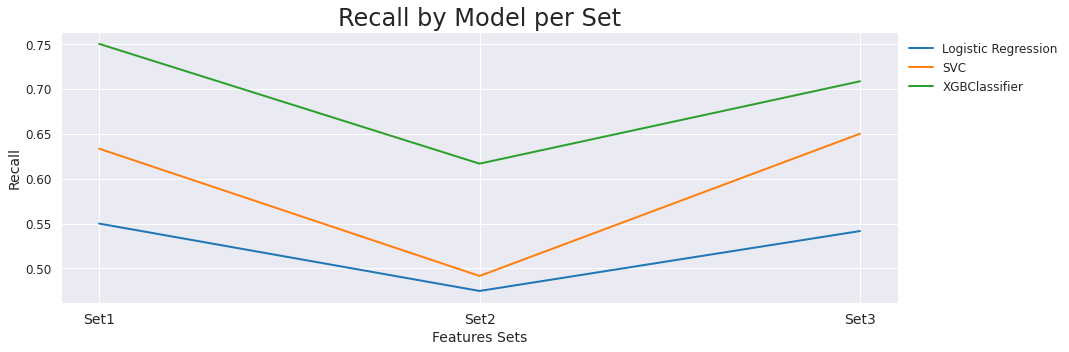

In [14]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i in result.Model[:3]:
    plt.plot(
        result[result.Model==i]['Features'], 
        result[result.Model==i]['Recall'], 
        linestyle= "-", 
        alpha=1., linewidth=2, 
        label = i
    )
    
    plt.legend()
    leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
    leg.get_frame().set_alpha(0.5)
    
    plt.xlabel("Features Sets")
    plt.ylabel("Recall")
    plt.title("Recall by Model per Set")

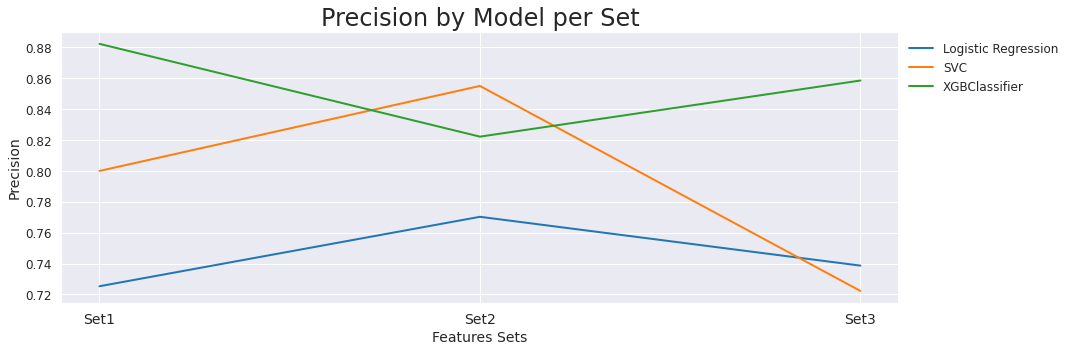

In [15]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i in result.Model[:3]:
    plt.plot(
        result[result.Model==i]['Features'], 
        result[result.Model==i]['Precision'], 
        linestyle= "-", 
        alpha=1., linewidth=2, 
        label = i
    )
    
    plt.legend()
    leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
    leg.get_frame().set_alpha(0.5)
    
    plt.xlabel("Features Sets")
    plt.ylabel("Precision")
    plt.title("Precision by Model per Set")

In [16]:
# Structure

df_pred = y_test.copy()
df_pred.rename(columns={'total_minutes':'true'}, inplace=True)
df_pred['pred_lr'] = y_pred_dLRs1
df_pred['pred_svc'] = y_pred_dSVCs1
df_pred['pred_XGBoost'] = y_pred_dXGBs1
df_pred

,,CBK_Sim,pred_lr,pred_svc,pred_XGBoost
Cartão,Data,,,,
400770******2516,2015-05-19 13:23:14,1,1,1,0
549159******6290,2015-05-07 12:00:17,0,0,0,0
490172******2479,2015-05-14 22:26:41,0,0,0,0
525631******7693,2015-05-08 10:11:23,0,0,0,0
498423******0198,2015-05-19 16:55:12,0,0,0,0
...,...,...,...,...,...
422061******9014,2015-05-23 15:34:07,1,0,1,1
434639******6034,2015-05-16 12:39:40,0,0,0,0
522840******4789,2015-05-22 18:18:20,0,0,0,0


# POC: XGBoost Default

In [31]:
xgbcs1 = xgb.XGBClassifier()

# Set 1
xgbcs1.fit(Xs1_train, y_train)
y_pred_dXGBs1 = xgbcs1.predict(Xs1_test)
y_pred_dXGBs1_scores = xgbcs1.predict_proba(Xs1_test)

[23:12:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
for i in range(df[features_set1].columns.shape[0]):
    print(df[features_set1].columns[i] + ": " + str(xgbcs1.feature_importances_[i]))

Valor: 0.028875407
pure_time: 0.022453904
same_day_count: 0.48165086
same_day_valor_count: 0.04161401
rank_same_day: 0.015584021
diff_time: 0.045315217
day_name_Friday: 0.034055483
day_name_Monday: 0.02090211
day_name_Saturday: 0.030936942
day_name_Sunday: 0.0110625895
day_name_Thursday: 0.02466786
day_name_Tuesday: 0.015263527
day_name_Wednesday: 0.041534014
day_of_month_RANGE_1-5: 0.029703252
day_of_month_RANGE_11-15: 0.027037945
day_of_month_RANGE_16-20: 0.0383469
day_of_month_RANGE_21-25: 0.026704
day_of_month_RANGE_6-10: 0.040729783
day_of_month_RANGE_>25: 0.023562187


<BarContainer object of 19 artists>

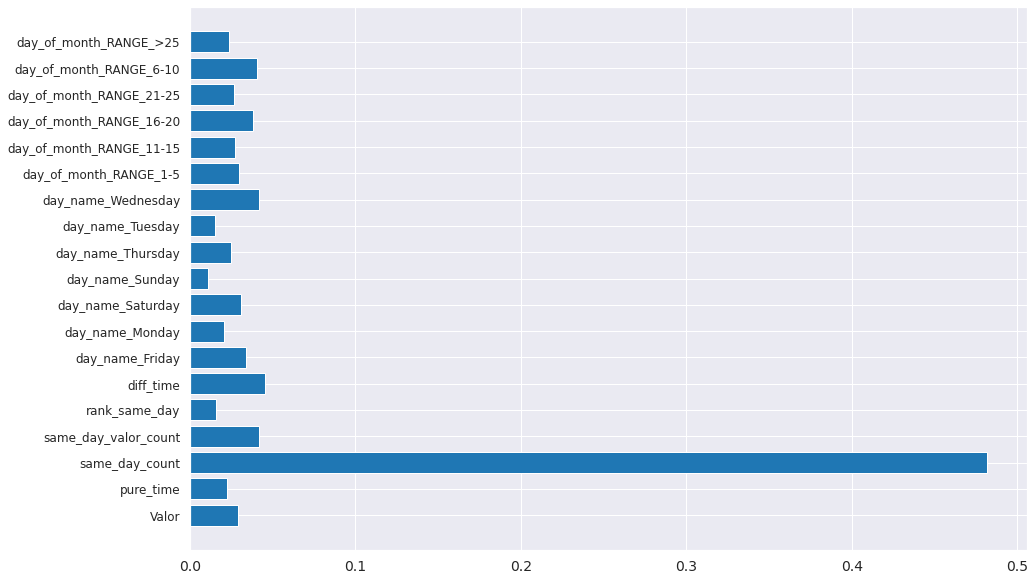

In [33]:
fig = plt.figure(figsize=(15,10))
plt.barh(Xs1_train.columns, xgbcs1.feature_importances_)

# Save Model

In [34]:
joblib.dump(xgbcs1, DATE + '_se1_' + 'XGBClassifier.sav')

['20220522_se1_XGBClassifier.sav']

In [35]:
df_pred.pred_XGBoost.value_counts(' ')

0    0.953657
1    0.046343
Name: pred_XGBoost, dtype: float64